## Notebook for playing around with variables in experimental and master objects

In [1]:
%run ./rob_setup_notebook.ipynb

import utils.interareal_analysis as ia
import utils.interareal_plotting as ip
import utils.utils_funcs as uf
import utils.gsheets_importer as gsi
from ia_funcs import *

from utils.paq2py import *


Suite2p path: ['/home/rlees/Documents/Code/suite2p/suite2p']
QNAP_path: /home/rlees/mnt/qnap 
QNAP_data_path /home/rlees/mnt/qnap/Data 
Pickle folder: /home/rlees/mnt/qnap/pkl_files 
Master pickle: /home/rlees/mnt/qnap/master_pkl/master_obj.pkl 
Figure save path: /home/rlees/mnt/qnap/Analysis/Plots 
STA movie save path: /home/rlees/mnt/qnap/Analysis/STA_movies 
S2 borders path: /home/rlees/mnt/qnap/Analysis/S2_borders


### Add or check attributes in all session objects

In [2]:
pkl_files = os.listdir(pkl_folder)

for i,pkl in enumerate(pkl_files):
    if 'J065.pkl' in pkl:
        
        pkl_path = os.path.join(pkl_folder, pkl)

        with open(pkl_path, 'rb') as f:
            ses_obj = pickle.load(f)
        
#             with open(pkl_path, 'wb') as f:
#                 pickle.dump(ses_obj, f)
                
#         exp_list = [ses_obj.photostim_r, ses_obj.photostim_s]

#         if ses_obj.spont.n_frames > 0:
#             exp_list.append(ses_obj.spont)

#         if ses_obj.whisker_stim.n_frames > 0:
#             exp_list.append(ses_obj.whisker_stim)
        
#         for exp_obj in exp_list:

In [3]:
# count number of whisker responsive cells targeted by pr or ps stim

pr_targ = ses_obj.photostim_r.targeted_cells
ps_targ = ses_obj.photostim_s.targeted_cells

pr_cells = np.where(pr_targ)[0]
ps_cells = np.where(ps_targ)[0]

w = np.array(ses_obj.whisker_stim.sta_sig[0])
s1_cells = np.array(ses_obj.whisker_stim.cell_s1[0])
w_sig = np.sum(w & s1_cells)
pr_w = np.sum(w[pr_cells])
ps_w = np.sum(w[ps_cells])

print('pickle:', pkl, 'w_resp:', w_sig, 'pr_w:', pr_w, 'ps_w:', ps_w)

pickle: 2020-03-05_RL072.pkl w_resp: 62 pr_w: 2 ps_w: 16


### Play with data from individual session objects

In [4]:
# List of pickle object file names
# '2019-06-11_J048',
# '2019-06-13_J052',
# '2019-06-25_RL048',
# '2019-07-15_RL052',
# '2019-08-14_J058',
# '2019-08-14_J059',
# '2019-08-15_RL055',
# '2019-11-14_J061',
# '2019-11-14_J063',
# '2019-11-15_J064',
# '2019-11-18_J065',
# '2020-02-27_RL075',
# '2020-03-03_RL074',
# '2020-03-05_RL070',
# '2020-03-05_RL072',
# '2020-03-12_RL070',
# '2020-03-16_RL074',
# '2020-03-19_RL075',
# '2020-03-20_RL080'

pkl_path = os.path.join(pkl_folder, '2019-11-14_J063.pkl')

with open(pkl_path, 'rb') as f:
    ses_obj = pickle.load(f)
    
print('Loaded pickled object.')

exp_obj = ses_obj.spont

Loaded pickled object.


In [7]:
# Interactive plotting

%matplotlib widget
from ipywidgets import *

x = range(dfsf_trials.shape[1])
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
line, = ax.plot(x, exp_obj.all_trials[0][0][:,10])

def update(cell,trial):
    line.set_ydata(exp_obj.all_trials[0][cell][:,trial])
    fig.canvas.draw_idle()

interact(update, 
         trial=widgets.IntSlider(min=0, max=dfsf_trials.shape[2]-1, step=1, value=0),
         cell=widgets.IntSlider(min=0, max=dfsf_trials.shape[0]-1, step=1, value=0));

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

interactive(children=(IntSlider(value=0, description='cell', max=2096), IntSlider(value=0, description='trial'…

### Show all attributes in ses_obj or exp_objs

In [3]:
# Show all attributes in ses_obj or exp_objs
print('Session object attributes')
for key, value in vars(ses_obj).items():
    print(key)

print('\nExperimental object attributes')
for key, value in vars(ses_obj.photostim_r).items():
    print(key)

Session object attributes
ss_id
sheet_name
s2p_path
photostim_r
photostim_s
whisker_stim
spont
frame_list

Experimental object attributes
tiff_path
naparm_path
paq_path
sheet_name
s2p_path
stim_channel
stim_type
fps
frame_x
frame_y
n_planes
pix_sz_x
pix_sz_y
scan_x
scan_y
zoom
n_frames
last_good_frame
n_groups
n_reps
n_shots
n_trials
inter_point_delay
spiral_size
single_stim_dur
stim_dur
frame_clock
stim_times
stim_start_frames
duration_frames
frames
cell_id
n_units
cell_plane
cell_med
cell_s1
cell_x
cell_y
raw
dfof
mean_img
xoff
yoff
all_trials
all_amplitudes
stas
sta_amplitudes
t_tests
trial_sig_dff
trial_sig_dfsf
sta_sig
sta_sig_nomulti
pre_frames
post_frames
test_frames
target_coords
n_targets
target_areas
targeted_cells
n_targeted_cells


Trial shape: (2097, 100, 184) float32
Amp shape: (2097, 100) float32
Sig shape: (2097, 100) bool
In S1 shape: (2097, 100) bool
Filtered amps shaped: (2097, 100) bool
Boolean array shape: (2097, 100) bool
New Boolean array shape: (2097, 100, 184) bool
Number of trials cell 0 is responding: 9.0
New trials shape: (1116, 184)


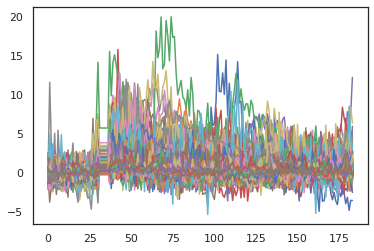

In [15]:
# Check all of the trials/mean trial for particular experiment

trials = copy.deepcopy(exp_obj.all_trials[0]) #[plane x cell x frame x trial]
trials = np.swapaxes(trials, 1, 2)
print('Trial shape:', trials.shape, trials.dtype)
amps = exp_obj.all_amplitudes[0] #[plane x cell x trial]
print('Amp shape:', amps.shape, amps.dtype)
sig = np.array(exp_obj.single_sig[0]) #[plane x cell x trial]
print('Sig shape:', sig.shape, sig.dtype)

in_s1 = np.array(ses_obj.photostim_r.cell_s1[0])
# in_s1 = np.invert(in_s1)
in_s1 = np.expand_dims(in_s1, axis=1)
in_s1 = np.repeat(in_s1, trials.shape[1], axis=1)
print('In S1 shape:', in_s1.shape, in_s1.dtype)

filt = 'pos'
if filt=='pos':
    amps = amps > 0
elif filt=='neg':
    amps = amps < 0
else: 
    amps = amps == True

print('Filtered amps shape:', amps.shape, amps.dtype)

# sig = sig == True
filt_bool = amps & sig & in_s1
print('Boolean array shape:', filt_bool.shape, filt_bool.dtype)

filt_bool = np.expand_dims(filt_bool, axis=2)
filt_bool = np.repeat(filt_bool, trials.shape[2], axis=2)
print('New Boolean array shape:', filt_bool.shape, filt_bool.dtype)
print('Number of trials cell 0 is responding:', np.sum(filt_bool[0])/trials.shape[2])

trials = trials[filt_bool].reshape(-1,trials.shape[2])
print('New trials shape:', trials.shape)
# plt.plot(np.nanmean(trials, axis=0));
plt.plot(trials.T);

In [6]:
def maskTrials(exp_obj, filt='pos'):

    trials = copy.deepcopy(exp_obj.all_trials[0]) #[plane x cell x frame x trial]
    amps = exp_obj.all_amplitudes[0] #[plane x cell x trial]
    sig = np.array(exp_obj.single_sig[0]) #[plane x cell x trial]

#     in_s1 = np.expand_dims(in_s1, axis=1)
#     in_s1 = np.repeat(in_s1, trials.shape[2], axis=1)

    if filt=='neg':
        amps = amps > 0
    elif filt=='pos':
        amps = amps < 0

    filt_bool = amps & sig

    filt_bool = np.expand_dims(filt_bool, axis=1)
    filt_bool = np.repeat(filt_bool, trials.shape[1], axis=1)

#     for cell in range(filt_bool.shape[0]):
#         for frame in range(filt_bool.shape[1]):
#             for trial in range(filt_bool.shape[2]):
#                 if filt_bool[cell, frame, trial] == False:
#                     trials[cell, frame, trial] = np.nan

    masked_trials = np.ma.masked_where(filt_bool, trials, copy=False)
    
    return masked_trials

### Grand mean trial dF/F function

In [2]:
def plotExpAvgDff(exp_obj, threshold, cell_ids):
    
    # all trials for all cells of interest
    cell_trials = np.array(exp_obj.all_trials[0][cell_ids][:][:])
    
    # mean across all trials for each cell
    cell_trial_means = np.nanmean(cell_trials, axis=2)

    # collapse trial mean for each cell in to one number, the overall mean dff
    cell_mean = np.nanmean(cell_trial_means, axis=1)
    
    # find mean dff greater than threshold and filter out
    extreme_means = np.where(abs(cell_mean) > threshold)
    if len(extreme_means[0]) > 0:
        print(len(extreme_means[0]), 'extreme values excluded')
    cell_trial_means = np.delete(cell_trial_means, extreme_means, axis=0)
    
    # make mean and std of traces
    grand_trial_mean = np.nanmean(cell_trial_means, axis=0)
    grand_trial_std = np.nanstd(cell_trial_means, axis=0)
    grand_trial_ci = 1.960 * (grand_trial_std/np.sqrt(len(cell_ids)))
    grand_trial_sem = grand_trial_std/np.sqrt(len(cell_ids))
    
    # construct patch to cover stim artifact period
#     stim_patch = patches.Rectangle((0,-100), exp_obj.duration_frames/fps, 999, zorder=3, color='lightgrey', lw=3, ec='white')
#     ax = plt.gca()
#     ax.add_patch(stim_patch)
    
    # make x axis in continous time units instead of frames
    fps = exp_obj.fps
    x = np.array(range( -exp_obj.pre_frames, exp_obj.post_frames ))/fps
    
    # find minimum and maximum x values (for plotting)
    x_max = np.max(x)
    x_min = np.min(x)
    
    #construct plot
    plt.plot(x, grand_trial_mean, lw=3, zorder=2);
    plt.fill_between(x, grand_trial_mean + grand_trial_ci, grand_trial_mean - grand_trial_ci, alpha=0.6, zorder=1);
    plt.hlines(0, x_min, x_max, linestyles='dashed', zorder=4, alpha=0.3);
    plt.ylim([-0.05, 0.15]);
    plt.autoscale(enable=True, axis='x', tight=True)
    plt.xlabel('time (seconds)');
    plt.ylabel('ΔF/F');
    
    return cell_trial_means

In [7]:
def plotExpAvgDffMasked(exp_obj, threshold, cell_ids, masked_trials):
    
    # all trials for all cells of interest
    cell_trials = masked_trials[cell_ids]
    
    # mean across all trials for each cell
    cell_trial_means = np.nanmean(cell_trials, axis=2)

    # collapse trial mean for each cell in to one number, the overall mean dff
    cell_mean = np.nanmean(cell_trial_means, axis=1)
    
    # find mean dff greater than threshold and filter out
    extreme_means = np.where(abs(cell_mean) > threshold)
    if len(extreme_means[0]) > 0:
        print(len(extreme_means[0]), 'extreme values excluded')
    cell_trial_means = np.delete(cell_trial_means, extreme_means, axis=0)
    
    # make mean and std of traces
    grand_trial_mean = np.nanmean(cell_trial_means, axis=0)
    grand_trial_std = np.nanstd(cell_trial_means, axis=0)
    grand_trial_ci = 1.960 * (grand_trial_std/np.sqrt(len(cell_ids)))
    grand_trial_sem = grand_trial_std/np.sqrt(len(cell_ids))
    
    # construct patch to cover stim artifact period
#     stim_patch = patches.Rectangle((0,-100), exp_obj.duration_frames/fps, 999, zorder=3, color='lightgrey', lw=3, ec='white')
#     ax = plt.gca()
#     ax.add_patch(stim_patch)
    
    # make x axis in continous time units instead of frames
    fps = exp_obj.fps
    x = np.array(range( -exp_obj.pre_frames , exp_obj.post_frames ))/fps
    
    # find minimum and maximum x values (for plotting)
    x_max = np.max(x)
    x_min = np.min(x)
    
    #construct plot
    plt.plot(x, grand_trial_mean, lw=3, zorder=2);
    plt.fill_between(x, grand_trial_mean + grand_trial_ci, grand_trial_mean - grand_trial_ci, alpha=0.6, zorder=1);
    plt.hlines(0, x_min, x_max, linestyles='dashed', zorder=4, alpha=0.3);
    plt.ylim([-0.05, 0.15]);
    plt.autoscale(enable=True, axis='x', tight=True)
    plt.xlabel('time (seconds)');
    plt.ylabel('ΔF/F');
    
    return cell_trial_means

### Plot grand mean trial dF/F (pooled cells and trial repeats, separated each trial type and session/animal)

/home/rlees/mnt/qnap/pkl_files/2019-11-14_J061.pkl
/home/rlees/mnt/qnap/pkl_files/2019-11-14_J063.pkl
/home/rlees/mnt/qnap/pkl_files/2019-11-15_J064.pkl
/home/rlees/mnt/qnap/pkl_files/2019-11-18_J065.pkl
/home/rlees/mnt/qnap/pkl_files/2020-02-27_RL075.pkl
/home/rlees/mnt/qnap/pkl_files/2020-03-03_RL074.pkl
/home/rlees/mnt/qnap/pkl_files/2020-03-05_RL070.pkl
1 extreme values excluded
1 extreme values excluded
1 extreme values excluded
/home/rlees/mnt/qnap/pkl_files/2020-03-05_RL072.pkl


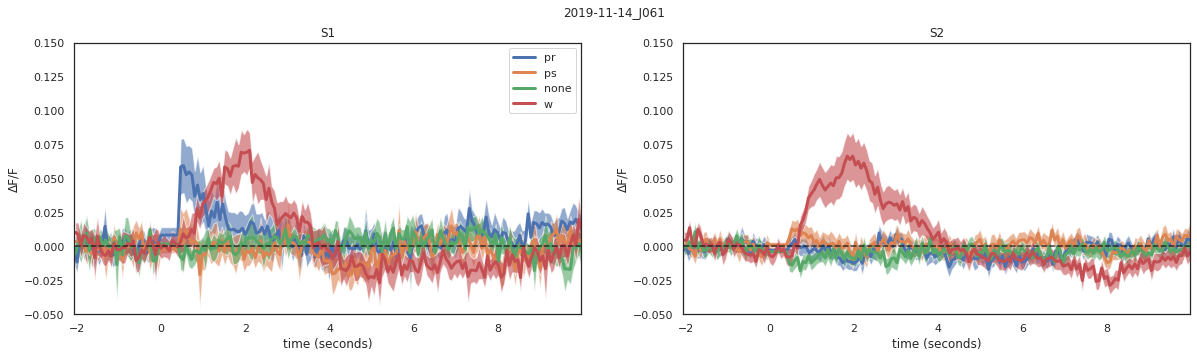

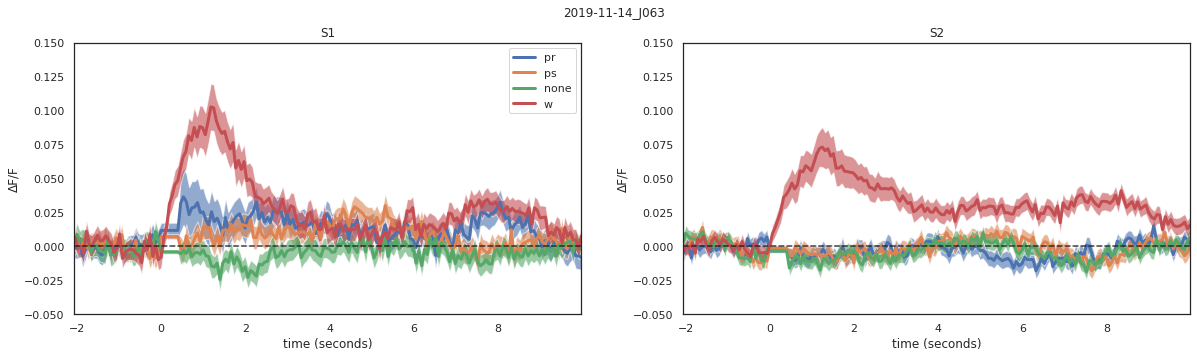

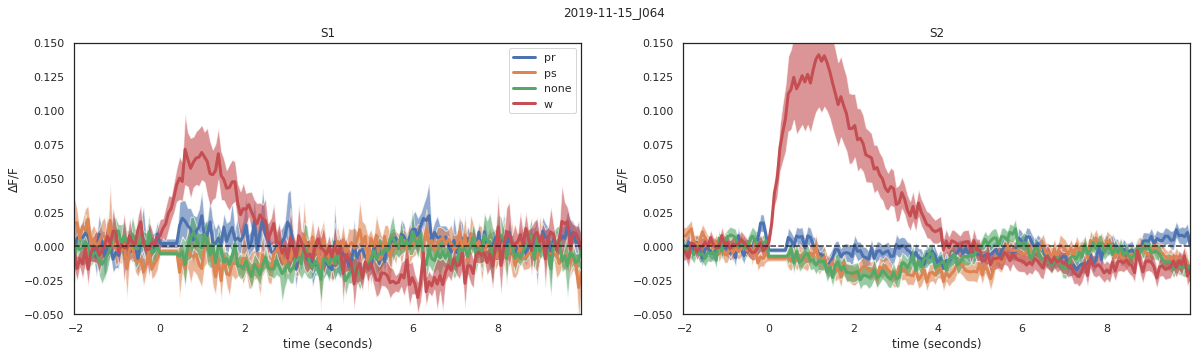

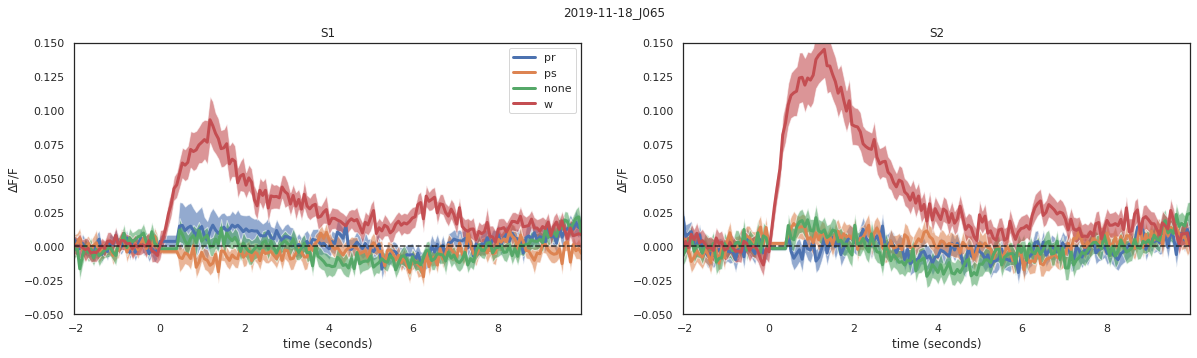

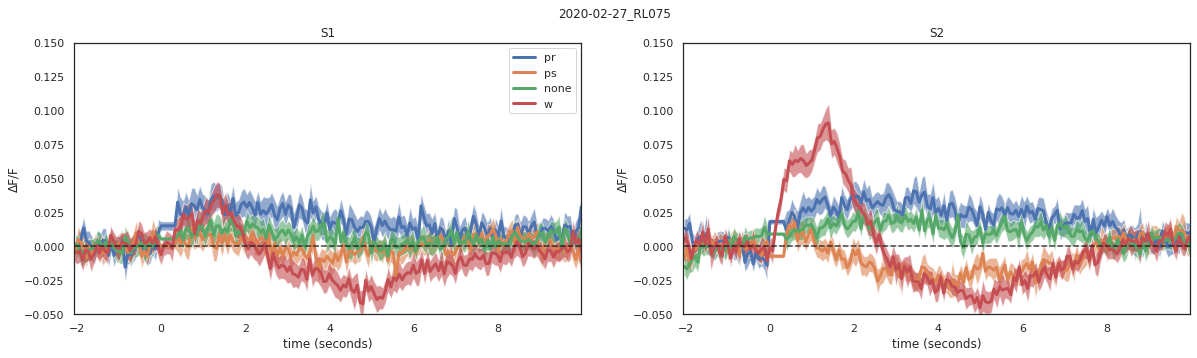

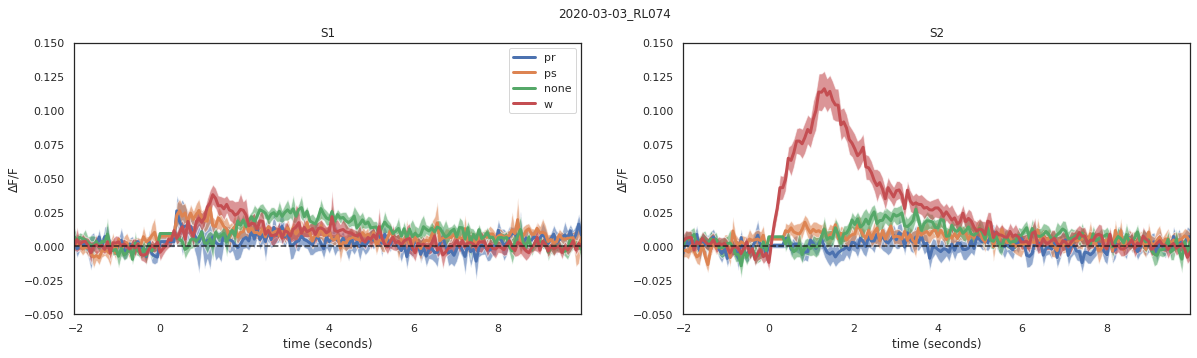

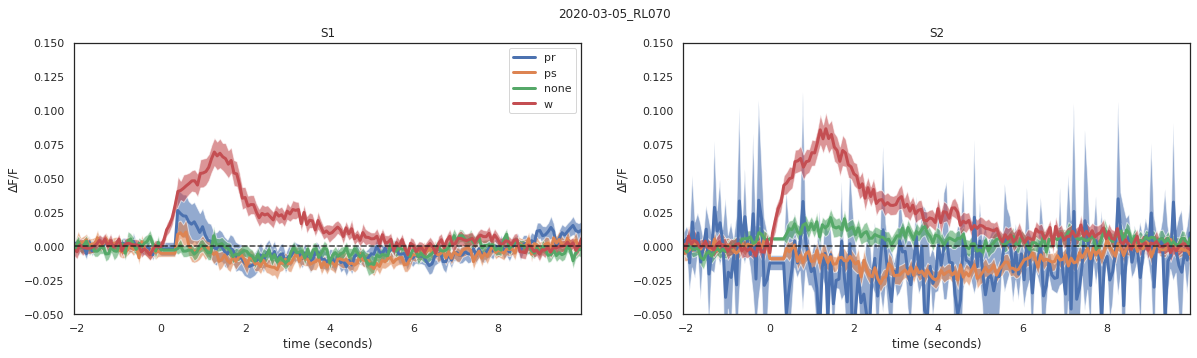

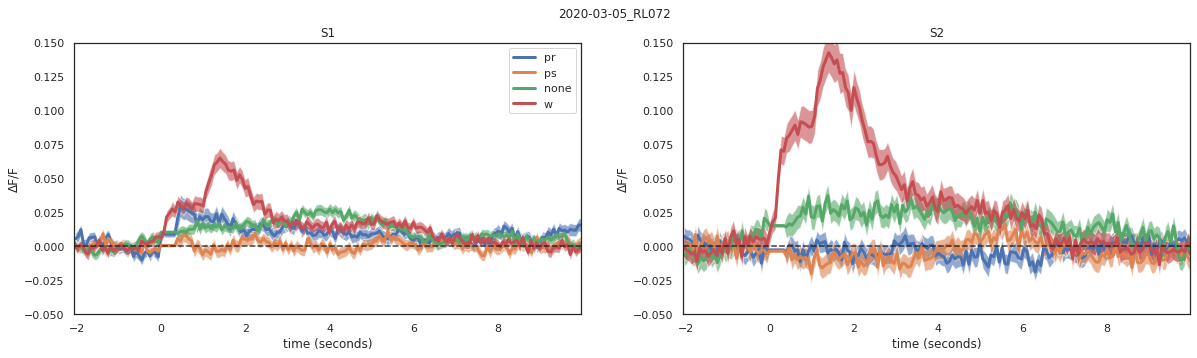

In [3]:
%matplotlib inline

pkl_files = os.listdir(pkl_folder)

threshold = 3

grand_average = []

for i,pkl in enumerate(pkl_files):
    if '.pkl' in pkl:
        
        pkl_path = os.path.join(pkl_folder, pkl)
        print(pkl_path)

        with open(pkl_path, 'rb') as f:
            ses_obj = pickle.load(f)

        exp_list = [ses_obj.photostim_r, ses_obj.photostim_s]

        if ses_obj.spont.n_frames > 0:
            exp_list.append(ses_obj.spont)

        if ses_obj.whisker_stim.n_frames > 0:
            exp_list.append(ses_obj.whisker_stim)
        
        fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20,5))
        labels = []
        
        for i, ax_id in enumerate([1,0]):
            
            in_s1 = np.array(ses_obj.photostim_r.cell_s1[0])
            cell_ids = np.where(in_s1 == i)[0]
            
            plt.sca(ax[ax_id])
            plt.title('S' + str(ax_id+1))
            
            for exp_obj in exp_list:
                
                # for filtering sta significant cells with pos/neg amps
#                 cell_loc = np.where(in_s1 == i)
#                 sig_cells = np.where(exp_obj.sta_sig[0])
#                 amps = np.where(exp_obj.sta_amplitudes[0] < 0)
#                 cell_ids = np.intersect1d(cell_loc[0], sig_cells)
#                 cell_ids = np.intersect1d(cell_ids, amps)
                
                if cell_ids.shape[0] > 0: 
#                     masked_trials = maskTrials(exp_obj, filt='pos')
#                     cell_trials = plotExpAvgDffMasked(exp_obj, threshold, cell_ids, masked_trials)
                    
                    labels.append(exp_obj.stim_type)
                    cell_trials = plotExpAvgDff(exp_obj, threshold, cell_ids)
                    grand_average.append(cell_trials)
        
        fig.suptitle(exp_obj.sheet_name)
        plt.legend(labels[:len(exp_list)], loc='upper right')
#         plt.savefig(os.path.join(fig_save_path, 'trial_avg_dff_traces_detrended', ses_obj.sheet_name + '_grand_trial_avg_s1s2_detrend.png'))
#         plt.savefig(os.path.join(fig_save_path, 'trial_avg_dff_traces_detrended', ses_obj.sheet_name + '_grand_trial_avg_s1s2_detrend.svg'))

### Plot grand mean dF/F (pooled animals, cells and trials, separated trial type)

8933 s1 cells
7383 s2 cells


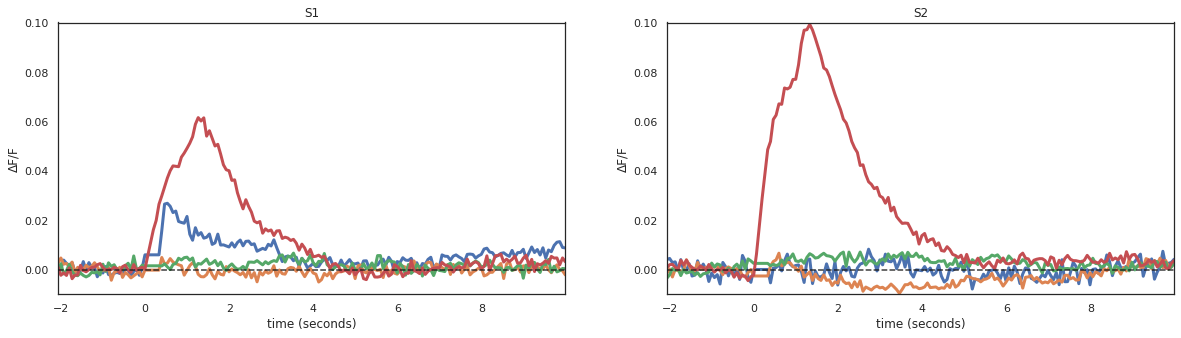

In [4]:
min_frames = np.inf
for avg in grand_average:
    curr_frames = np.size(avg, axis=1)
    if curr_frames < min_frames:
        min_frames = curr_frames
        
s2_pr = np.concatenate(np.array([avg[:,:min_frames] for avg in grand_average[::8]]), axis=0)
s2_ps = np.concatenate(np.array([avg[:,:min_frames] for avg in grand_average[1::8]]), axis=0)
s2_none = np.concatenate(np.array([avg[:,:min_frames] for avg in grand_average[2::8]]), axis=0)
s2_w = np.concatenate(np.array([avg[:,:min_frames] for avg in grand_average[3::8]]), axis=0)

s1_pr = np.concatenate(np.array([avg[:,:min_frames] for avg in grand_average[4::8]]), axis=0)
s1_ps = np.concatenate(np.array([avg[:,:min_frames] for avg in grand_average[5::8]]), axis=0)
s1_none = np.concatenate(np.array([avg[:,:min_frames] for avg in grand_average[6::8]]), axis=0)
s1_w = np.concatenate(np.array([avg[:,:min_frames] for avg in grand_average[7::8]]), axis=0)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20,5))

plt.sca(ax[0])
plt.title('S1')

for trials in [s1_pr, s1_ps, s1_none, s1_w]:
    
    grand_mean = np.mean(trials, axis=0)
    grand_std = np.std(grand_mean, axis=0)
    grand_ci = 1.960 * (grand_std/np.sqrt(trials.shape[0]))
    grand_sem = grand_std/np.sqrt(trials.shape[0])

    fps = exp_obj.fps
    x = np.array(range( -exp_obj.pre_frames , exp_obj.post_frames ))/fps

    # find minimum and maximum x values (for plotting)
    x_max = np.max(x)
    x_min = np.min(x)

    #construct plot
    plt.plot(x, grand_mean, lw=3, zorder=2);
    plt.fill_between(x, grand_mean + grand_sem, grand_mean - grand_sem, alpha=0.6, zorder=1);
    plt.hlines(0, x_min, x_max, linestyles='dashed', zorder=4, alpha=0.3);
    plt.ylim([-0.01, 0.1]);
    plt.autoscale(enable=True, axis='x', tight=True)
    plt.xlabel('time (seconds)');
    plt.ylabel('ΔF/F');
    
plt.sca(ax[1])
plt.title('S2')

for trials in [s2_pr, s2_ps, s2_none, s2_w]:
    
    grand_mean = np.mean(trials, axis=0)
    grand_std = np.std(grand_mean, axis=0)
    grand_ci = 1.960 * (grand_std/np.sqrt(trials.shape[0]))
    grand_sem = grand_std/np.sqrt(trials.shape[0])

    fps = exp_obj.fps
    x = np.array(range( -exp_obj.pre_frames , exp_obj.post_frames ))/fps

    # find minimum and maximum x values (for plotting)
    x_max = np.max(x)
    x_min = np.min(x)

    #construct plot
    plt.plot(x, grand_mean, lw=3, zorder=2);
    plt.fill_between(x, grand_mean + grand_sem, grand_mean - grand_sem, alpha=0.6, zorder=1);
    plt.hlines(0, x_min, x_max, linestyles='dashed', zorder=4, alpha=0.3);
    plt.ylim([-0.01, 0.1]);
    plt.autoscale(enable=True, axis='x', tight=True)
    plt.xlabel('time (seconds)');
    plt.ylabel('ΔF/F');
    
print(s1_w.shape[0], 's1 cells')
print(s2_w.shape[0], 's2 cells')

# plt.savefig(os.path.join(fig_save_path, 'grand_avg_traces_detrended', 'grand_mean_sem_s1s2.png'))
# plt.savefig(os.path.join(fig_save_path, 'grand_avg_traces_detrended', 'grand_mean_sem_s1s2.svg'))

### Plot positive and negative amplitudes in space (pooled trial repeats, separated trial type, session and cell)

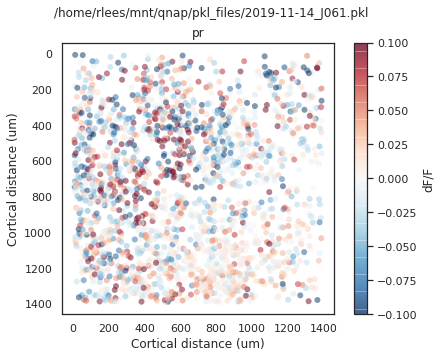

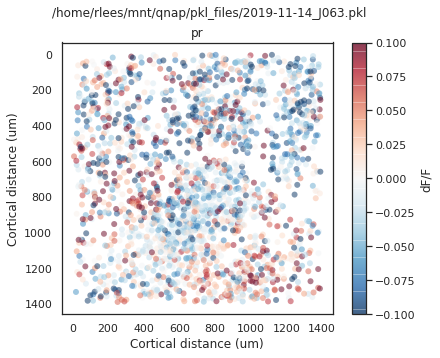

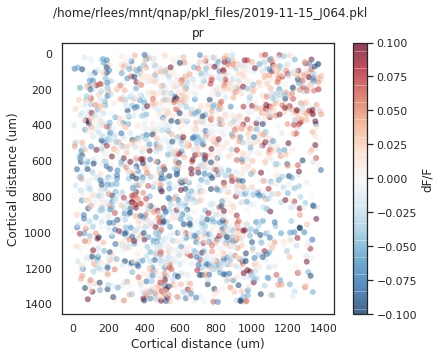

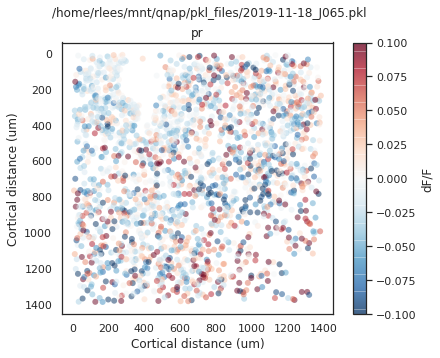

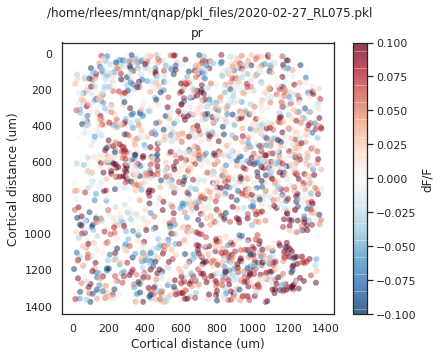

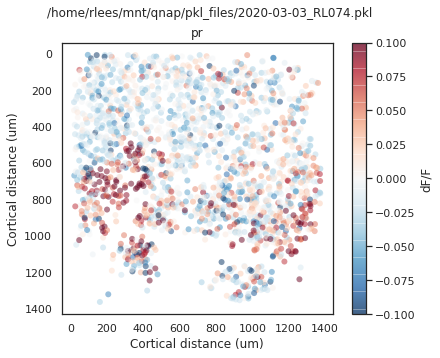

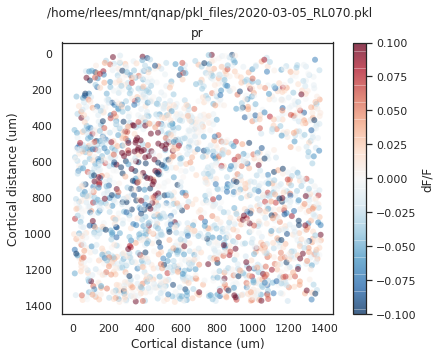

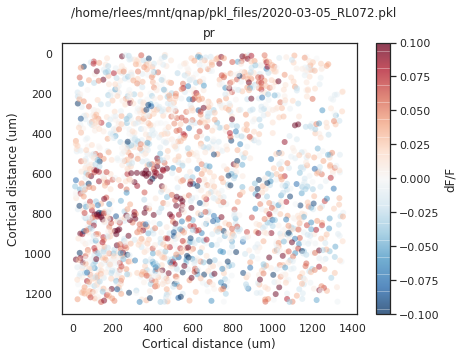

In [5]:
# plot sta excitation and inhibition in space 

pkl_files = os.listdir(pkl_folder)

all_amps = []
all_dists = []
all_x = []
all_y = []

for i,pkl in enumerate(pkl_files):
    if '.pkl' in pkl:
        
        pkl_path = os.path.join(pkl_folder, pkl)

        with open(pkl_path, 'rb') as f:
            ses_obj = pickle.load(f)
        
        exp_list = []
        exp_list.append(ses_obj.photostim_r)
#         exp_list.append(ses_obj.photostim_s)
        
#         if ses_obj.whisker_stim.n_frames > 0:
#             exp_list.append(ses_obj.whisker_stim)
            
#         if ses_obj.spont.n_frames > 0:
#             exp_list.append(ses_obj.spont)
        
        fig = plt.figure(figsize=(7*len(exp_list),5))
        fig.suptitle(pkl_path)
        
        for i,exp_obj in enumerate(exp_list):
            
            followers = []

            for cell in range(exp_obj.n_units[0]):
                cell_coord = exp_obj.cell_med[0][cell]
                
                if exp_obj.stim_type is 'w':
                    followers.append(([cell_coord[1],cell_coord[0]], exp_obj.sta_amplitudes[0][cell]))
                elif exp_obj.stim_type is 'none':
                    if ses_obj.photostim_r.targeted_cells[cell]==0:
                        followers.append(([cell_coord[1],cell_coord[0]], exp_obj.sta_amplitudes[0][cell]))
                else:
                    if exp_obj.targeted_cells[cell]==0:
                        followers.append(([cell_coord[1],cell_coord[0]], exp_obj.sta_amplitudes[0][cell]))
                
#             tree = spatial.KDTree(exp_obj.target_coords)

            norm_x = []
            norm_y = []
            amps = []
            dists = []

            for coord, amp in followers:
#                 dist, index = tree.query(coord)
#                 x,y = np.subtract(coord, exp_obj.target_coords[index])
#                 norm_x.append(x)
#                 norm_y.append(y)
#                 dists.append(dist)
                amps.append(amp)
                
                norm_x.append(coord[0])
                norm_y.append(coord[1])
                                
            x_um = [x*exp_obj.pix_sz_x for x in norm_x]
            y_um = [y*exp_obj.pix_sz_y for y in norm_y]
            ax = fig.add_subplot(1, len(exp_list), i+1)
            sc = ax.scatter(x_um, y_um, c=amps, cmap='RdBu_r', vmin=-0.1, vmax=0.1, alpha=0.5, linewidth=0)
            
            ax.set_aspect('equal')
            ax.set_xlabel('Cortical distance (um)')
            ax.set_ylabel('Cortical distance (um)')
            ax.set_title(exp_obj.stim_type)
            ax.set_ylim(ax.get_ylim()[::-1])
    
            all_amps.extend(amps)
            all_dists.extend(np.absolute(dists))
            all_x.extend(x_um)
            all_y.extend(y_um)
            
        cb = plt.colorbar(sc, ax=ax)
        cb.set_label('dF/F')
        
#         plt.savefig(os.path.join(fig_save_path, 'spatial_responses', pkl[:-4] + '_pr_ps_w_spont_dFF_spatial.png'))
#         plt.savefig(os.path.join(fig_save_path, 'spatial_responses', pkl[:-4] + '_pr_ps_w_spont_dFF_spatial.svg'))

### Function for plotting average responses in space

In [6]:
def binned_amplitudes_2d(all_x, all_y, all_amps):
    all_amps_real = np.nan_to_num(all_amps)
    denominator, xedges, yedges = np.histogram2d(all_x, all_y, bins=20)
    numerator, _, _ = np.histogram2d(all_x, all_y, bins=20, weights=all_amps_real)
    h = numerator/denominator
    Y, X = np.meshgrid(xedges, yedges)
    
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,5), sharex=True, sharey=True)
    mesh1 = ax[0].pcolormesh(X, Y, h, cmap='RdBu_r', vmin=-0.1, vmax=0.1)
    ax[0].set_xlabel('Cortical distance (um)')
    ax[0].set_ylabel('Cortical distance (um)')
    ax[0].set_aspect('equal')
    ax[0].set_ylim([1400, 0])
    ax[0].set_title('Binned responses (900 bins)')
    cb = plt.colorbar(mesh1, ax=ax[0])
    cb.set_label('dF/F')

    mesh2 = ax[1].pcolormesh(X, Y, denominator.astype(int), cmap='inferno', vmin=0, vmax=np.amax(denominator))
    ax[1].set_xlabel('Cortical distance (um)')
    ax[1].set_ylabel('Cortical distance (um)')
    ax[1].set_aspect('equal')
    ax[1].set_ylim([1400, 0])
    ax[1].set_title('Number of cells in bin')
    cb = plt.colorbar(mesh2, ax=ax[1])
    cb.set_label('num cells')

### Plot average response to stim, binned in 2D (pooled animal and trial repeats, separated trial types)

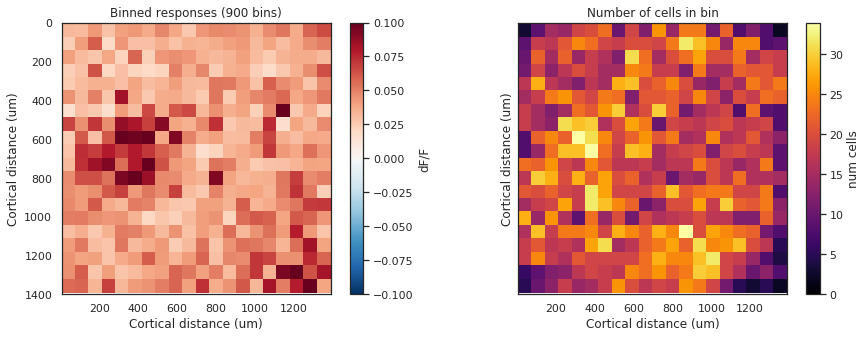

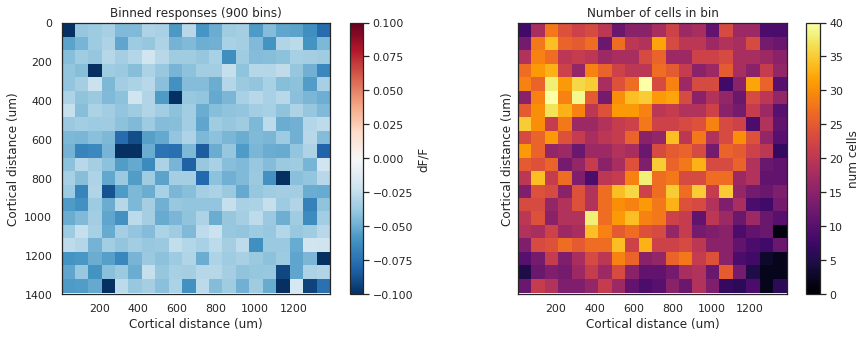

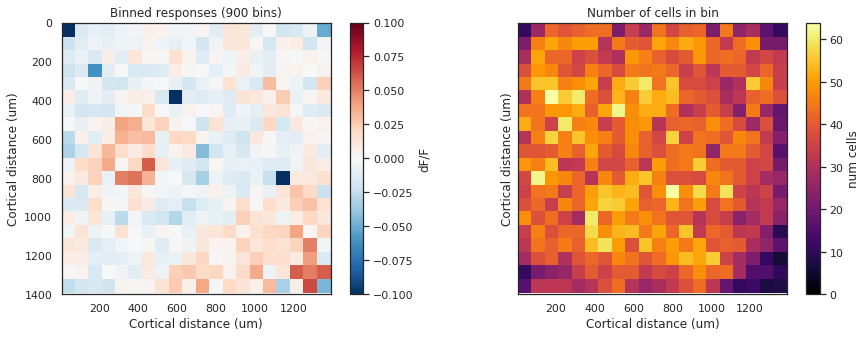

In [7]:
stim = 'pr'

indices = [i for i,amp in enumerate(all_amps) if amp > 0]
x = [x for i,x in enumerate(all_x) if i in indices]
y = [y for i,y in enumerate(all_y) if i in indices]
pos_amps = [amp for i,amp in enumerate(all_amps) if i in indices]

binned_amplitudes_2d(x, y, pos_amps)
# plt.savefig(os.path.join(fig_save_path, 'avg_spatial_responses', 'BAFOV_' + stim + '_dFF_spatial_pos.png'))
# plt.savefig(os.path.join(fig_save_path, 'avg_spatial_responses', 'BAFOV_' + stim + '_dFF_spatial_pos.svg'))

indices = [i for i,amp in enumerate(all_amps) if amp < 0]
x = [x for i,x in enumerate(all_x) if i in indices]
y = [y for i,y in enumerate(all_y) if i in indices]
neg_amps = [amp for i,amp in enumerate(all_amps) if i in indices]

binned_amplitudes_2d(x, y, neg_amps)
# plt.savefig(os.path.join(fig_save_path, 'avg_spatial_responses', 'BAFOV_' + stim + '_dFF_spatial_neg.png'))
# plt.savefig(os.path.join(fig_save_path, 'avg_spatial_responses', 'BAFOV_' + stim + '_dFF_spatial_neg.svg'))

binned_amplitudes_2d(all_x, all_y, all_amps)
# plt.savefig(os.path.join(fig_save_path, 'avg_spatial_responses', 'BAFOV_' + stim + '_dFF_spatial_sum.png'))
# plt.savefig(os.path.join(fig_save_path, 'avg_spatial_responses', 'BAFOV_' + stim + '_dFF_spatial_sum.svg'))

### Play with whisker stim data

In [ ]:
# Calculate the number of cells that responded both to whisker stim and photostim

# a = np.where(ses_obj.whisker_stim.sta_sig[0])
# b = np.where(ses_obj.photostim_r.sta_sig[0])
# print(a,b)
# sum(1 for i in b[0] if i in a[0])

# Plot whisker stim trials where cells went over 200 dFF

plt.figure(figsize=(5,10))
sta_mean = []

for i, sta in enumerate(ses_obj.whisker_stim.stas[0]):
    if ses_obj.whisker_stim.sta_sig[0][i]:
        plt.plot(sta, alpha=0.2)
        sta_mean.append(sta)
    
        if ses_obj.whisker_stim.sta_amplitudes[0][i] > 200:
            print(ses_obj.whisker_stim.cell_id[0][i])
            
sta_mean = np.mean(sta_mean, axis=0)

plt.plot(sta_mean, 'k', linewidth=2);

plt.axis([0, 55, -10, 300]);

### Play with dataframes from master object

In [2]:
with open(master_path, 'rb') as f:
    master_obj = pickle.load(f)

df = master_obj.df
print(df.columns)

Index(['sheet_name', 'tiff_path', 'stim_type', 'fps', 'n_units', 's1_cells',
       's2_sta', 's2_sta_amp', 's2_sta_std', 's1_sta', 's1_sta_amp',
       's1_sta_std', 'num_s1_cells', 'num_s2_cells',
       'positive_s1_responders_trial', 'negative_s1_responders_trial',
       'positive_s2_responders_trial', 'negative_s2_responders_trial',
       'positive_s1_responders_sta', 'negative_s1_responders_sta',
       'positive_s2_responders_sta', 'negative_s2_responders_sta',
       'positive_s1_responders_sta_nomulti',
       'negative_s1_responders_sta_nomulti',
       'positive_s2_responders_sta_nomulti',
       'negative_s2_responders_sta_nomulti', 'prob_response', 'n_targets',
       'target_cells', 'n_targeted_cells', 'stim_dur', 'stim_freq',
       'target_sta', 'target_sta_amp', 'target_sta_std', 'non_target_sta',
       'non_target_sta_amp', 'non_target_sta_std', 'target_responders_trial',
       'target_responders_trial_sum', 'target_responders',
       'target_responders_sta', 'ta

In [6]:
np.sum(master_obj.s1_cells[0] == True)

1064

In [8]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
fps,32.0,15.181280,0.085094,15.023208,15.218564,15.222730,15.229723,15.231754
n_units,32.0,2039.625000,76.558116,1917.000000,1975.750000,2044.000000,2103.250000,2144.000000
s2_sta_amp,32.0,0.028056,0.049202,-0.024545,-0.003111,0.005346,0.039643,0.138558
s1_sta_amp,32.0,0.021742,0.025886,-0.009537,0.004644,0.012929,0.031314,0.093175
num_s1_cells,32.0,1116.625000,171.581590,892.000000,999.500000,1110.000000,1192.750000,1422.000000
num_s2_cells,32.0,923.000000,189.499851,623.000000,830.750000,923.000000,999.500000,1230.000000
positive_s1_responders_sta,32.0,51.812500,57.084791,0.000000,6.000000,35.500000,66.500000,199.000000
negative_s1_responders_sta,32.0,4.062500,7.259865,0.000000,0.000000,0.000000,4.500000,29.000000
positive_s2_responders_sta,32.0,42.625000,75.286871,0.000000,0.000000,0.000000,56.250000,266.000000
negative_s2_responders_sta,32.0,2.062500,5.576087,0.000000,0.000000,0.000000,0.250000,27.000000
